# U.S. Medical Insurance Costs

Some possible ideas for analysis are the following:

- Find out the average age of the patients in the dataset.
- Analyze where a majority of the individuals are from.
- Look at the different costs between smokers vs. non-smokers.
- Figure out what the average age is for someone who has at least one child in this dataset.
- Compare BMI of different age groups.

In [79]:
# Import the csv library
import csv

In [80]:
# Open the CSV file
file = open('insurance.csv')

type(file)

_io.TextIOWrapper

In [81]:
# Use the csv.reader object to read the CSV file
csvreader = csv.reader(file)

In [82]:
# Extract the field names
header = []
header = next(csvreader)
header

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [83]:
# Extract the rows/records
rows = []
for row in csvreader:
        rows.append(row)
# rows

In [84]:
# Close the file
file.close()

In [85]:
# Implementing the above code using with() statement:
import csv
rows = []
with open("insurance.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
# header
# rows

## Find out the average age of the patients in the dataset.


In [86]:
# loop through the age column, add up the total age and divide the total age by the length of the age list
def get_average_age(all_rows):
    total_age = 0
    for row in all_rows:
        total_age += float(row[2])
    average_age = total_age / len(all_rows)
    return average_age
print("The average age of the patients in the dataset is {:.2f}.".format(get_average_age(rows)))

The average age of the patients in the dataset is 30.66.


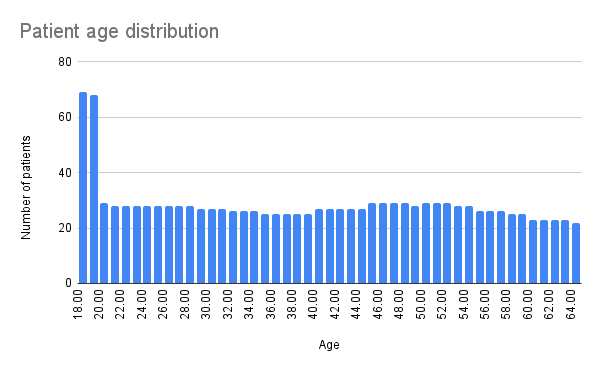

## Analyze where a majority of the individuals are from.


In [87]:
# loop through region column, add up the total of each region and return as a dictionary 
def get_number_of_patients_in_each_region(all_rows):
    region_freq = {}
    for row in all_rows:
        region = row[5]
        if region in region_freq:
            region_freq[region] += 1
        else:
            region_freq[region] = 1
    return region_freq   

region_freq = get_number_of_patients_in_each_region(rows)

# sort by frequency in descencing order
sorted_region_freq = sorted(region_freq.items(), key=lambda x: x[1], reverse=True)

for region_and_freq in sorted_region_freq:
    print("Number of patients in {}: {} ({:.1f}%)".format(region_and_freq[0], region_and_freq[1], region_and_freq[1] / len(rows) * 100))   




Number of patients in southeast: 364 (27.2%)
Number of patients in southwest: 325 (24.3%)
Number of patients in northwest: 325 (24.3%)
Number of patients in northeast: 324 (24.2%)


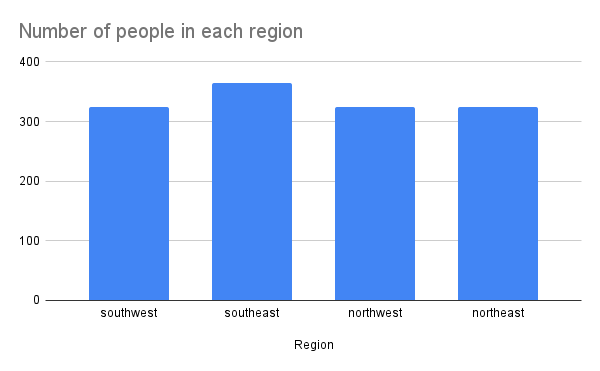

## Look at the different costs between smokers vs. non-smokers.


In [88]:
# Loop through the 'smoker' column, if he/she was a smoker, add up the smoker insurance cost,
# else add up to the non-smoker insurance cost get the average insurance cost by dividing
# the total insurance cost by the number of smokers or non smokers, respectively.
def get_average_insurance_cost_smoker_vs_non_smoker(all_rows):
    smoker_total_cost = 0
    non_smoker_total_cost = 0
    total_non_smokers = 0
    total_smokers = 0
    for row in all_rows:
        if row[4] == "yes":
            smoker_total_cost += float(row[6])
            total_smokers += 1
        else:
            non_smoker_total_cost += float(row[6])
            total_non_smokers += 1
    
    non_smoker_avg = non_smoker_total_cost / total_non_smokers
    smoker_avg = smoker_total_cost / total_smokers
    return (non_smoker_avg, smoker_avg)

avg_cost = get_average_insurance_cost_smoker_vs_non_smoker(rows)
print("The average insurance cost of non smoker: ${:,.2f}.".format(avg_cost[0]))
print("The average insurance cost of smoker: ${:,.2f}.".format(avg_cost[1]))


The average insurance cost of non smoker: $8,434.27.
The average insurance cost of smoker: $32,050.23.


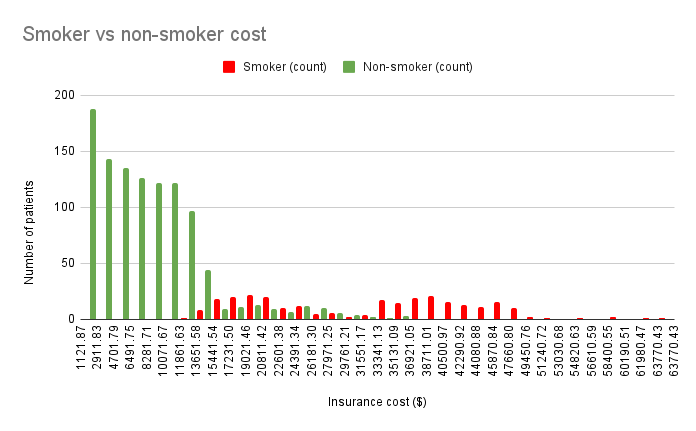

## Figure out what the average age is for someone who has at least one child in this dataset.

In [89]:
# loop through the list of patients, add up the age of patients who have at least one child,
# and divide by number of those patients 
def average_age_of_people_with_at_least_one_child(all_rows):
    total_age = 0
    total_people_who_have_at_least_one_child = 0
    for row in all_rows:
        if int(row[3]) >= 1:
            total_age += float(row[0])
            total_people_who_have_at_least_one_child += 1
    average_age = total_age / total_people_who_have_at_least_one_child
    return average_age
print("The average age of people who has at least one child is {:.2f} years old.".format(average_age_of_people_with_at_least_one_child(rows)))
    

The average age of people who has at least one child is 39.78 years old.


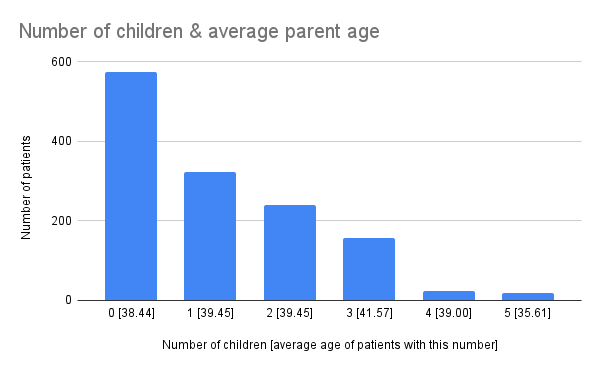

## Compare BMI of different age groups.

In [90]:
import math
import collections

def get_average_bmi_in_each_age_group(rows):
    num_people_in_each_category = {}
    bmi_sum_in_each_category = {}
    for patient in rows:
        # Figure out age bucket of this patient
        age_category = math.floor(int(patient[0]) / 10)
        
        if age_category in num_people_in_each_category:
            num_people_in_each_category[age_category] += 1
            bmi_sum_in_each_category[age_category] += float(patient[2])
        else:
            num_people_in_each_category[age_category] = 1
            bmi_sum_in_each_category[age_category] = float(patient[2])                       

    #print("total counts in each group: " + str(num_people_in_each_category))  
    #print("total BMI in each group:" + str(bmi_sum_in_each_category))  
    
    # divide total BMI by total num of patients in each bucket
    average_bmis_in_each_category = {}
    for age_category in num_people_in_each_category:
         average_bmis_in_each_category[age_category] = bmi_sum_in_each_category[age_category] / num_people_in_each_category[age_category] 
    
    return average_bmis_in_each_category

sorted_bmi_by_age_group = collections.OrderedDict(sorted(get_average_bmi_in_each_age_group(rows).items()))

for age_group, average_bmi in sorted_bmi_by_age_group.items():
    print("Patients aged {:d}-{:d} have average BMI of {:.2f}".format(age_group * 10, age_group * 10 + 9, average_bmi))


Patients aged 10-19 have average BMI of 29.97
Patients aged 20-29 have average BMI of 29.79
Patients aged 30-39 have average BMI of 30.44
Patients aged 40-49 have average BMI of 30.71
Patients aged 50-59 have average BMI of 31.51
Patients aged 60-69 have average BMI of 32.02


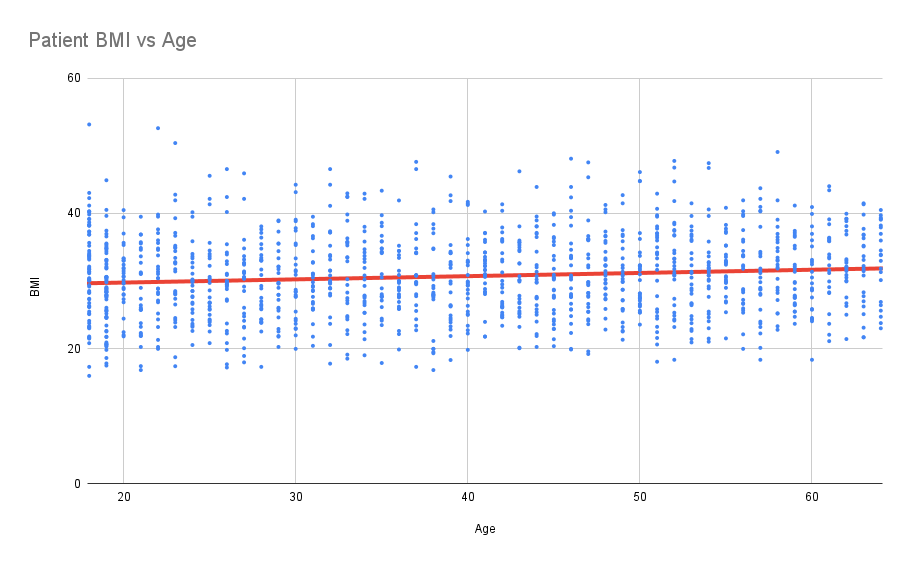